# Exploratory Data Analysis

![](https://www.cranfield.ac.uk/~/media/Images/mastheads/masthead-bix-mh344x810.ashx?h=344&la=en&mw=810&w=810&hash=4AD63583A5EA5BF7E5E561A1C62A8F7879F36571)

In [1]:
# %load utils/imports.py
%matplotlib inline

import numpy as np
import pandas as pd

# from utils import *
# from utils.plotting import *

# from utils.styles import *

> Doing statistics is like doing crosswords except that one cannot know for sure whether one has found the solution.

<footer>~  John W. Tukey</footer>

![break](assets/agenda.png)

### Agenda

* Deal with Missing Data
* Explore Data by Visualisations

![break](assets/theory.png)

### Motivating Example... Catching Cheaters

![](assets/cplot.Rout-0.png)

[Source](http://jd-mathbio.blogspot.ca/2015/02/finding-cheaters-using-multiple-choice.html?utm_source=marketo&utm_medium=email&utm_campaign=DA-NL-202&mkt_tok=3RkMMJWWfF9wsRokvq3MZKXonjHpfsX%2B7%2BooW6Gg38431UFwdcjKPmjr1YEETcB0aPyQAgobGp5I5FEOS7PYS6V6t6EOUg%3D%3D)

## The Goals of Exploratory Data Analysis

1. Summarize the main characteristics of datasets with Summary Statistics (Initial Data Analysis)
1. Visually inspect the structure and nature of the data
1. Find what the data can tell us beyond the formal modeling or hypothesis testing task.

#### Example : Measurement Precision

![](assets/rounding1.png)

![](assets/rounding2.png)

![](assets/rounding3.png)

### Let the visuals speak to you

Always explore your data visually. Whatever specific hypothesis you have when you go out to collect data is likely to be worse than any of the hypotheses you’ll form after looking at just a few simple visualizations of that data.

#### Load `ggplot` and plot graphs inline

In [2]:
%%sh
pip install ggplot

In [3]:
from ggplot import *
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

### How are zipcodes distributed in the US?

In [4]:
zipcodes = pd.read_csv("data/zipcodes.csv")
zipcodes.head(10)

,zip,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
0,544,UNIQUE,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631.0,40.81,-73.04,NaN,US,0,0,NaN
1,601,STANDARD,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas,America/Puerto_Rico,787939.0,18.16,-66.72,NaN,US,0,0,NaN
2,602,STANDARD,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,NaN,NaN,787.0,18.38,-67.18,NaN,US,0,0,NaN
3,603,STANDARD,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla,America/Puerto_Rico,787.0,18.43,-67.15,NaN,US,0,0,NaN
4,604,PO BOX,Aguadilla,Ramey,NaN,PR,NaN,NaN,NaN,18.43,-67.15,NaN,US,0,0,NaN
5,605,PO BOX,Aguadilla,NaN,NaN,PR,NaN,NaN,NaN,18.43,-67.15,NaN,US,0,0,NaN
6,606,STANDARD,Maricao,NaN,Urb San Juan Bautista,PR,Maricao,America/Puerto_Rico,787939.0,18.18,-66.98,NaN,US,0,0,NaN
7,610,STANDARD,Anasco,NaN,"Brisas De Anasco, Est De Valle Verde, Jard De ...",PR,NaN,NaN,787.0,18.28,-67.14,NaN,US,0,0,NaN
8,611,PO BOX,Angeles,NaN,NaN,PR,NaN,NaN,NaN,18.28,-66.79,NaN,US,0,0,"no NWS data,"
9,612,STANDARD,Arecibo,NaN,"Alt De Juncos, Alt De San Felipe, Bda Duhamel,...",PR,Arecibo,America/Puerto_Rico,787.0,18.45,-66.73,NaN,US,0,0,NaN


In [5]:
zipcodes[zipcodes.zip < 8000]

,zip,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
0,544,UNIQUE,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,6.310000e+02,40.81,-73.04,NaN,US,0,0,NaN
1,601,STANDARD,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas,America/Puerto_Rico,7.879390e+05,18.16,-66.72,NaN,US,0,0,NaN
2,602,STANDARD,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,NaN,NaN,7.870000e+02,18.38,-67.18,NaN,US,0,0,NaN
3,603,STANDARD,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla,America/Puerto_Rico,7.870000e+02,18.43,-67.15,NaN,US,0,0,NaN
4,604,PO BOX,Aguadilla,Ramey,NaN,PR,NaN,NaN,NaN,18.43,-67.15,NaN,US,0,0,NaN
5,605,PO BOX,Aguadilla,NaN,NaN,PR,NaN,NaN,NaN,18.43,-67.15,NaN,US,0,0,NaN
6,606,STANDARD,Maricao,NaN,Urb San Juan Bautista,PR,Maricao,America/Puerto_Rico,7.879390e+05,18.18,-66.98,NaN,US,0,0,NaN
7,610,STANDARD,Anasco,NaN,"Brisas De Anasco, Est De Valle Verde, Jard De ...",PR,NaN,NaN,7.870000e+02,18.28,-67.14,NaN,US,0,0,NaN
8,611,PO BOX,Angeles,NaN,NaN,PR,NaN,NaN,NaN,18.28,-66.79,NaN,US,0,0,"no NWS data,"
9,612,STANDARD,Arecibo,NaN,"Alt De Juncos, Alt De San Felipe, Bda Duhamel,...",PR,Arecibo,America/Puerto_Rico,7.870000e+02,18.45,-66.73,NaN,US,0,0,NaN


In [6]:
zipcodes[zipcodes.country.str.contains('CN')]

,zip,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
40781,96522,MILITARY,Fpo,NaN,NaN,AP,NaN,NaN,NaN,0.0,0.0,AS,CN,0,0,;Country and installation from MPSA Ballot


/home/io/.tools/anaconda/envs/dsx/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


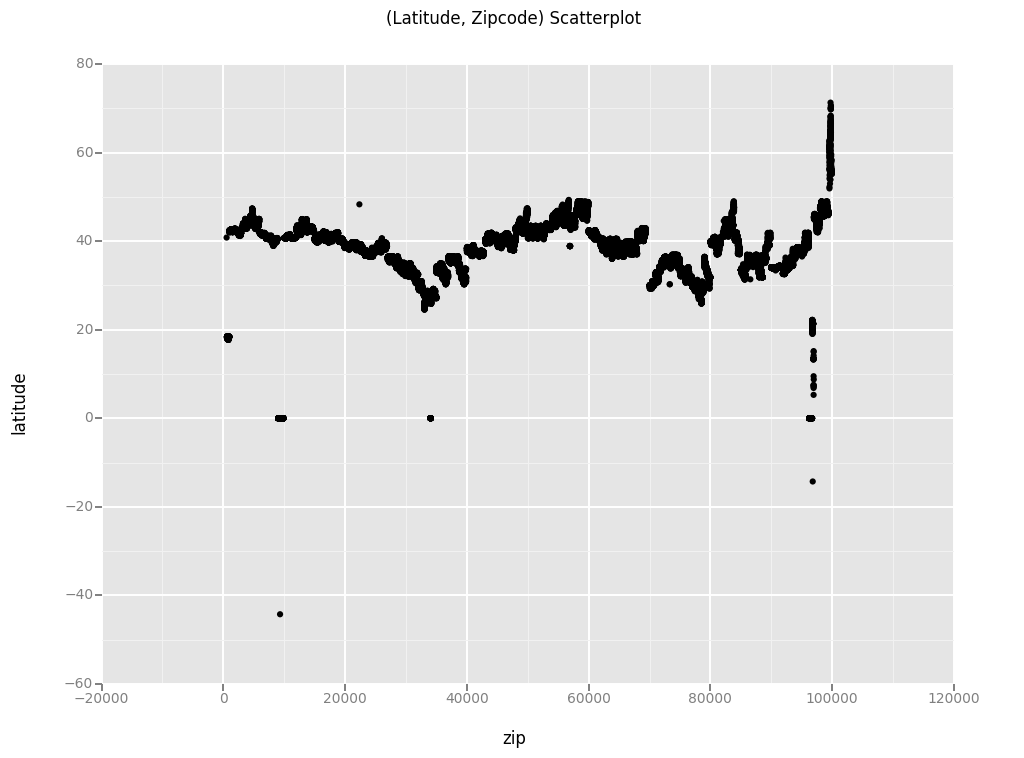

<ggplot: (8770955431397)>

In [7]:
ggplot(zipcodes, aes(x = 'zip', y = 'latitude')) + \
    geom_point() + \
    ggtitle("(Latitude, Zipcode) Scatterplot")

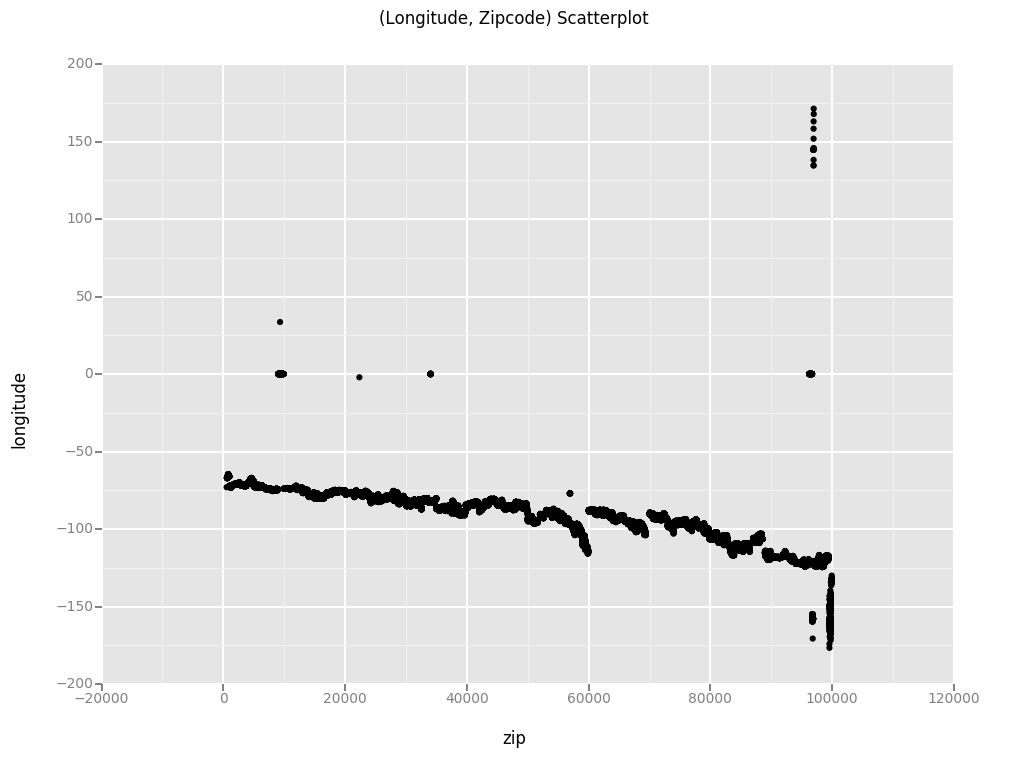

<ggplot: (8770970638121)>

In [8]:
ggplot(zipcodes, aes(x = 'zip', y = 'longitude')) + \
    geom_point() + \
    ggtitle("(Longitude, Zipcode) Scatterplot")

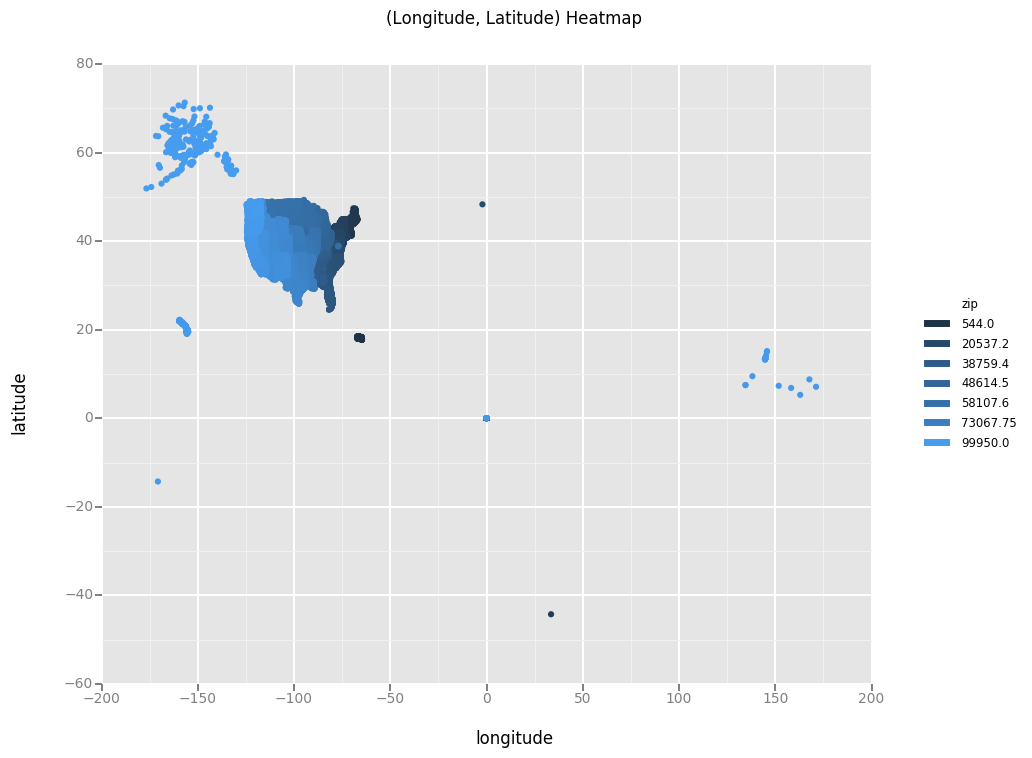

<ggplot: (8770953755921)>

In [9]:
ggplot(zipcodes, aes(x = 'longitude', y = 'latitude', color = 'zip')) + \
    geom_point() + \
    ggtitle("(Longitude, Latitude) Heatmap")

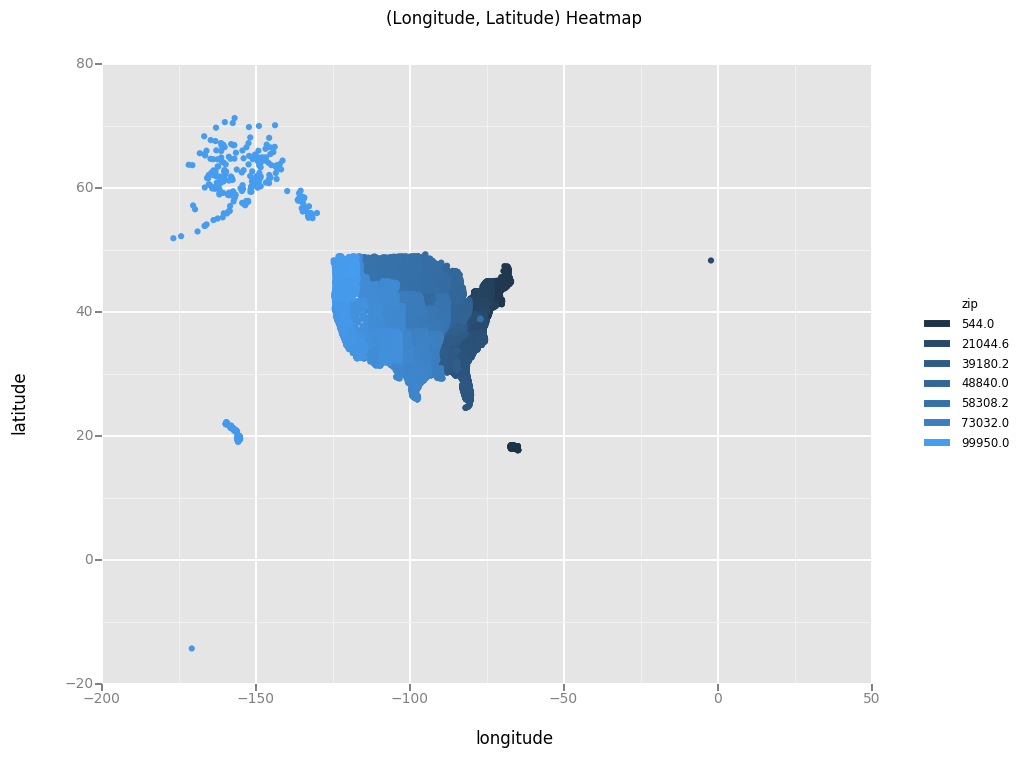

<ggplot: (8770953755997)>

In [10]:
ggplot(zipcodes[zipcodes['longitude'] < 0], aes(x = 'longitude', y = 'latitude', color = 'zip')) + \
    geom_point() + \
    ggtitle("(Longitude, Latitude) Heatmap")

## Graph Literacy

What's important in a dataset isn't always obvious by looking at the graph in first instance. The following two graphs are based on real world data where we were looking at how effective a particular education programme was. The number of users going through the programme at any given time varied wildly, so this had a huge effect on how 'succesful' we considered the programme to be.

### Absolute vs Ratio

First, the ratio graph, cause you might expect that the ratio between the two may give a more balance view of the programme. i.e. it minimizes the effect that simply because there's many students going through the programme, it has many graduates.

Time is on the X-Axis, ratio of non-graduates / graduates on the Y-Axis:

![](assets/eda-example-2.png)

**What's interesting? What's worthy of deeper inspection? How might a programme manager user this chart?**

Also note that zero here is artificial - there were so few users these months, and none of them graduated! So as a ratio, that should have been inf, but that's not graphable, so we decided to fill it in with zero. And alternative would have been to set a maximum ratio, say `20` and assign that number instead. This may have been a better representatation of the rate.

Time is on the X-Axis, absolute number of non-graduates and graduates on the Y-Axis:

![](assets/eda-example-1.png)

**Now what's become interesting? What's worthy of deeper inspection? How might a programme manager user this chart?**

1. How is this chart technically different from previous one?
2. Does this chart serve a different purpose? Is it better at highlighting certain aspects of the data?
3. What doesn't it represent well? What information did we lose between the format and the current chart?

Suddenly a very different pattern emerges, and the starting month, and the latest month are the outliers with a much higher user count. After talking to the clien, it turned out that in the former case they were dealing with legacy data where they hadn't always tracked graduation data correctly, and in the latter case, some of these students were STILL in the programme so it wasn't fair to lump them together with the other students who hadn't graduated.


## Objectives of Exploratory Data Analysis

* **Quality of measurements**
* **Quality of data**
* **Initial transformations**
* **Univariate statistics** (single variable)
* **Bivariate associations** (correlations)
* **Multivarite patterns** (analysis)

### Missing Data

In this section, we will discuss missing (also referred to as **NA**) values in pandas.

#### When / why does data become missing?

Some might quibble over our usage of missing. By “missing” we simply mean null or “not present for whatever reason”. Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. For example, in a collection of financial time series, some of the time series might start on different dates. Thus, values prior to the start date would generally be marked as missing.

As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data. While `NaN` is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, the Python `None` will arise and we wish to also consider that “missing” or “null”.

* NaN and None (in object arrays) are considered missing by the isnull and notnull functions. inf and -inf are no longer considered missing by default.
* To make detecting missing values easier (and across different array dtypes), pandas provides the `isnull()` and `notnull()` functions, which are also methods on `Series` objects:

In [11]:
np.array([True,1,2,3])

array([1, 1, 2, 3])

In [12]:
np.array([True,True,True,True])

array([ True,  True,  True,  True], dtype=bool)

In [13]:
np.array([True,True,'a',1.2])

array(['True', 'True', 'a', '1.2'], 
      dtype='|S5')

In [14]:
np.array([True,True,True,True])

array([ True,  True,  True,  True], dtype=bool)

In [15]:
np.array([1,2,3,4])

array([1, 2, 3, 4])

In [16]:
df

NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import numpy as np
from random import sample

data = list(range(10))

df = pd.DataFrame(data, columns=['data'])
df['fulldata'] = data

rows = [2, 3, 6, 8, 5, 7]

df.data.loc[rows[:3]] = None
df.data.loc[rows[3:]] = np.nan

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df[pd.notnull(df.data)]

In [ ]:
pd.notnull(df.data)
# same as
df.data.notnull()

In [ ]:
df

In [ ]:
df[df.data.isnull()]

#### Calculations with missing data

The descriptive statistics and computational methods in pandas are all written to account for missing data

* When summing data, `NA` (missing) values will be treated as zero
* If the data are all `NA`, the result will be `NA`
* Methods like `cumsum` and `cumprod` ignore `NA` values, but preserve them in the resulting arrays

In [ ]:
df

In [ ]:
df.data.sum()

In [ ]:
df.mean(1)

In [ ]:
df.cumsum()

### Dropping Data

In [ ]:
df.drop('data', axis=1)

### Cleaning / filling missing data

pandas objects are equipped with various data manipulation methods for dealing with missing data

#### Filling missing values: `fillna()`

The `fillna` function can “fill in” NA values with non-null data in a couple of ways, which we illustrate:

##### Replace NA with a scalar value

In [ ]:
np.nan?

In [ ]:
df.fillna(0)

In [ ]:
df['data'].fillna('missing')

#### Fill gaps forward or backward

We can propagate non-null values forward or backward:

In [ ]:
df1 = df.fillna(method='pad')
df1

#### Limit the amount of filling

If we only want consecutive gaps filled up to a certain number of data points, we can use the limit keyword:

In [ ]:
df.fillna(method='pad', limit=1)

These are the available filling methods:

| Method | Action |
|--------|--------|
| pad / ffill	Fill | values forward |
| bfill / backfill | Fill values backward |

With time series data, using pad/ffill is extremely common so that the “last known value” is available at every time point.

The ffill() function is equivalent to fillna(method='ffill') and bfill() is equivalent to fillna(method='bfill')

You can also fillna using a `dict` or `Series` that is alignable. The labels of the `dict` or `index` of the `Series` must match the columns of the frame you wish to fill. The use case of this is to fill a DataFrame with the mean of that column.

In [ ]:
df.mean()

In [ ]:
df.sum()

In [ ]:
df.notnull()

In [ ]:
df.notnull().sum()

In [ ]:
df.fillna(df.mean())

In [ ]:
df.data

### Dropping axis labels with missing data: dropna

You may wish to simply exclude labels from a data set which refer to missing data. To do this, use the dropna method:

In [ ]:
df

In [ ]:
df.dropna()

In [ ]:
df.dropna()

For a full overview of the API, see the [documentation](http://pandas.pydata.org/pandas-docs/dev/api.html#api-dataframe-missing)

### Interpolation

Both Series and Dataframe objects have an interpolate method that, by default, performs linear interpolation at missing datapoints.

This is where datatypes become important again. Notice the `dtype` of the 'data' column.

In [ ]:
df.data

First we need to get rid of the 'None' values, as this makes it into the loosest 'object' datatype. Using NaN we can use the float dataetime..

In [ ]:
df.isnull()

In [ ]:
type(np.nan)

In [ ]:
df[df.isnull()] = np.nan
# df.info()

use `astype` to coerce a column into a specific datatype.

In [ ]:
df.data.astype('float')

In [ ]:
df.data = df.data.astype(np.float)

In [ ]:
df.ix[9,:] = [20,9]

In [ ]:
df

In [ ]:
df

In [ ]:
df.interpolate()

For a floating-point index, use method='values'

In [ ]:
dfxx = df.ix[[0,2,5,9]]

In [ ]:
dfxx

In [ ]:
dfxx.interpolate()

In [ ]:
dfxx.interpolate(method='values')

In [ ]:
df['data']

In [ ]:
df.iloc[:3,[1]]

In [ ]:
df.loc[:3,'data']

In [ ]:
df.loc[:3,['data']]

In [ ]:
df.ix[1]

In [ ]:
ff = df.index.tolist()
ff[0] = 'a'
df.index = ff
df

In [ ]:
df.iloc[1,:]

In [ ]:
df.loc[1,:]

As a practical review of what's discussed here see this [summary](http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/#missing)

### Tips

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

    Source: Bryant, P. G. and Smith, M. A. (1995), Practical Data Analysis:
    Case Studies in Business Statistics, Richard D. Irwin Publishing, Homewood, IL.

**What are the factors that affect tipping behavior?**

#### Load the Dataset

In [ ]:
import pandas as pd

In [ ]:
from ggplot import *

tips = pd.read_csv('data/tips.csv')

#### Inspect the variables

In [ ]:
tips.head(3)

In [ ]:
tips.time.value_counts()

In [ ]:
tips.info()

In [ ]:
tips.describe()

In [ ]:
tips.time.value_counts()

In [ ]:
tips.describe()

In [ ]:
# info() is more informative than 'describe()' as
# it gives you the datatypes length of dataset
tips.info()

In [ ]:
tips.head()

In [ ]:
# tips['smoker'].value_counts()
# tips[['smoker']].value_counts()

tips.index
# tips.ix[2:5, :'day']
tips.iloc[:,:]

In [ ]:
pd.__version__

In [ ]:
import ggplot

In [ ]:
ggplot.__version__

In [ ]:
tips.index

In [ ]:
sample(tips.index.tolist(),10)

In [ ]:
from random import sample
# tips.sample(10)
# Look at a random sample of the rows
tips.ix[sample(tips.index.tolist(),10),:]

In [89]:
tips.sample(10, axis=1)

,smoker,sex,size
0,No,F,2
1,No,M,3
2,No,M,3
3,No,M,2
4,No,F,4
5,No,M,4
6,No,M,2
7,No,M,4
8,No,M,2
9,No,M,2


In [90]:
# Inspect head and tail of the dataset

In [91]:
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


In [92]:
tips.tail()

,obs,totbill,tip,sex,smoker,day,time,size
239,240,29.03,5.92,M,No,Sat,Night,3
240,241,27.18,2.00,F,Yes,Sat,Night,2
241,242,22.67,2.00,M,Yes,Sat,Night,2
242,243,17.82,1.75,M,No,Sat,Night,2
243,244,18.78,3.00,F,No,Thu,Night,2


We look first at the variable of greatest interest to the waiter: tip. A common graph for looking at a single variable is the histogram, where data values are binned and the count is represented by a rectangular bar.

In [93]:
%matplotlib inline

### Tip

Start your exploration of a single parameter - usually you'd pick the more important one for your research question.

In [94]:
tips[tips.tip > 8]

,obs,totbill,tip,sex,smoker,day,time,size
170,171,50.81,10.0,M,Yes,Sat,Night,3
212,213,48.33,9.0,M,No,Sat,Night,4


In [96]:
from ggplot import *

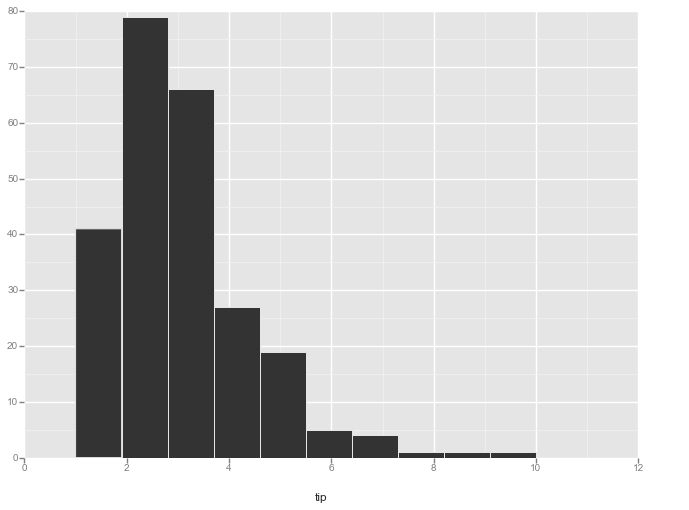

<ggplot: (-9223363262846938957)>

In [97]:
ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=1)

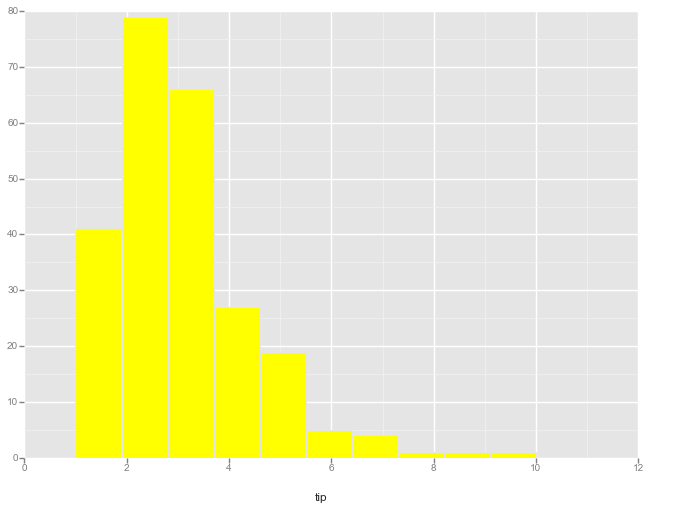

<ggplot: (8774007810831)>

In [98]:
# Draw with black outline, yellow fill
ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=1, colour="black", fill="yellow")

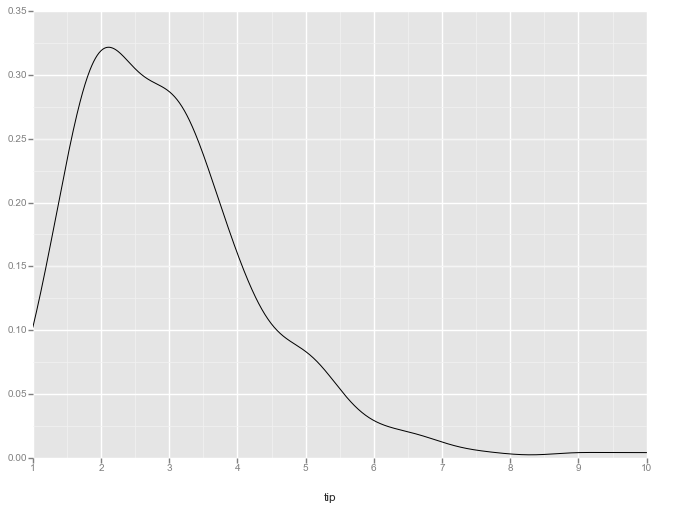

<ggplot: (-9223363262846478641)>

In [99]:
# Density curve
ggplot(tips, aes(x='tip')) + geom_density()

TypeError: unorderable types: float() > NoneType()

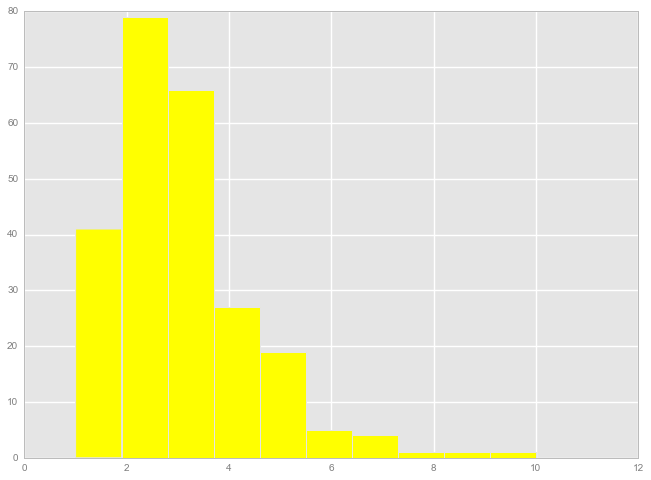

In [100]:
# Add a line for the mean:
avg_tips = tips.tip.mean()

ggplot(tips, aes(x='tip')) + \
    geom_histogram(aes(y='..density..'),      # Histogram with density instead of count on y-axis
                   binwidth=1,
                   colour="black",
                   fill="yellow") + \
    geom_vline(aes(xintercept=avg_tips),
               color="red",
               linetype="dashed",
               size=2)

The distribution appears to be unimodal; that is, it has one peak, the bar representing the tips greater than \$1.50 and less than or equal \$2.50. There are
very few tips of \$1.50 or less. The number of larger tips trails off rapidly, which suggests that this is not a very expensive restaurant.

The conclusions drawn from a histogram are often influenced by the choice of bin width, which is a parameter of the _graph_ and not of the _data_.


#### Tip 2
Experiment with different bin-widths for you histograms - at low granulairty, you'll get a better idea of the overall distribution, at higher levels of granulairty you can inspect whether any 'clipping' is occuring. In other words, **a large bin width smooths out the graph and shows rough or global trends, whereas a smaller bin width highlights more local features**.

In [101]:
# Draw with black outline, yellow fill, binwidth at $0.10
p01 = ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=0.1, colour="black", fill="yellow")

# Draw with black outline, yellow fill, binwidth at $0.50
p05 = ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=0.5, colour="black", fill="yellow")

# Draw with black outline, yellow fill, binwidth at $1
p1 = ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=1, colour="black", fill="yellow")

# Draw with black outline, yellow fill, binwidth at $1
p4 = ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=4, colour="black", fill="yellow")

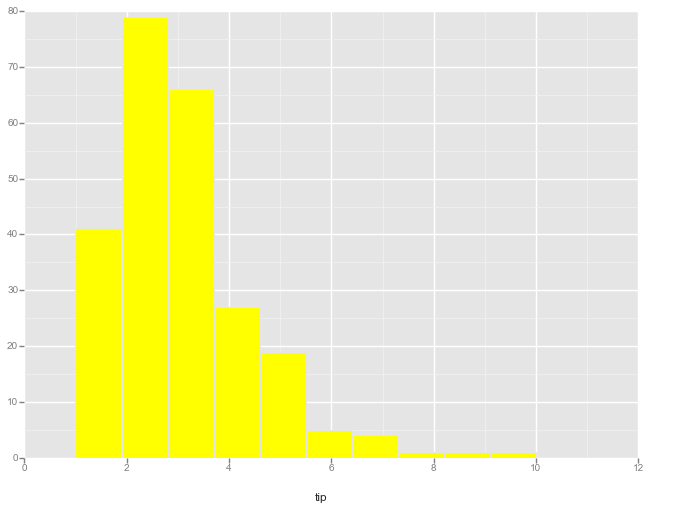

<ggplot: (-9223363262846985072)>

In [102]:
ggplot(tips, aes(x='tip')) + geom_histogram(binwidth=0.1, colour="black", fill="yellow")

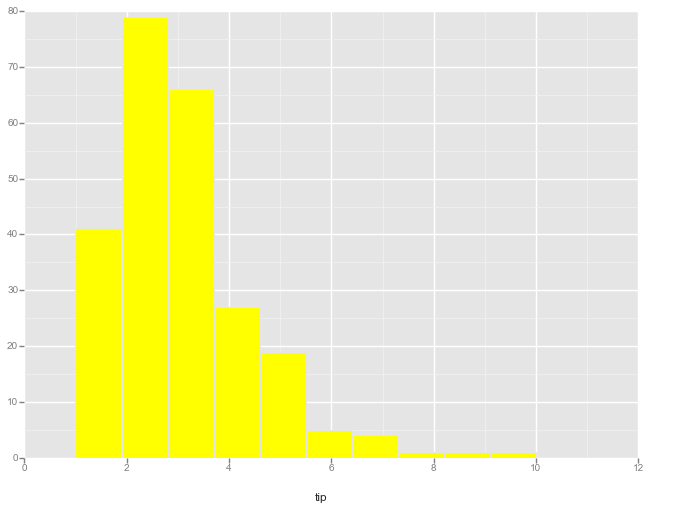

<ggplot: (-9223363262847697790)>

In [103]:
p05

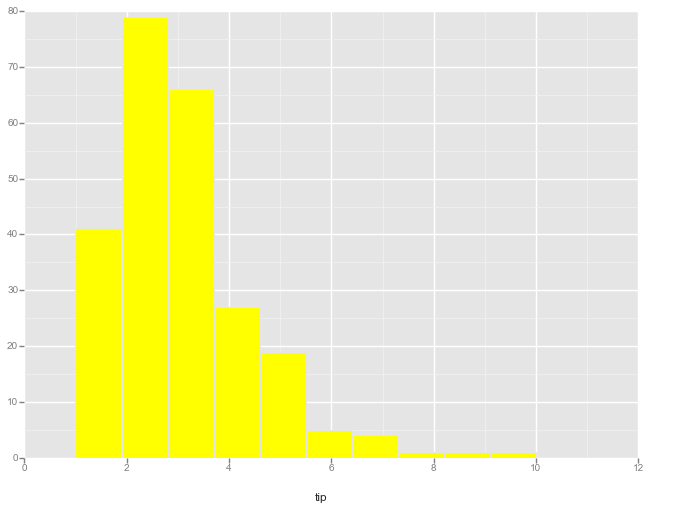

<ggplot: (8774007078934)>

In [104]:
p1

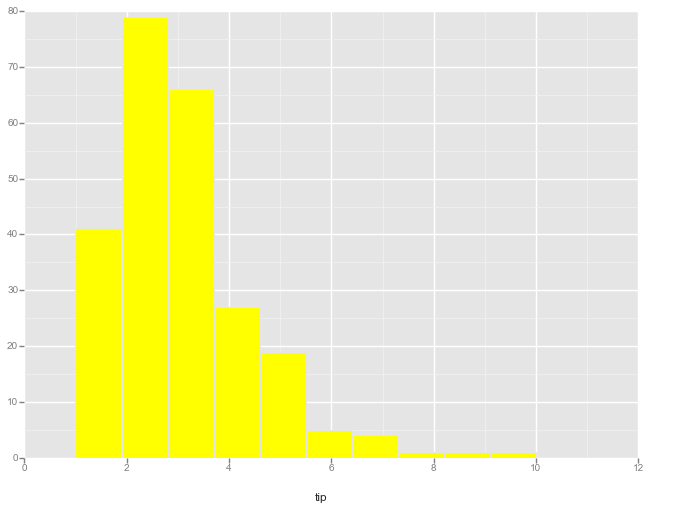

<ggplot: (8774007090429)>

In [105]:
p4

This shows a histogram with a smaller bin width, 10c. At the smaller bin width the shape is multimodal, and it is clear that there are large peaks at the full
dollars and smaller peaks at the half dollar. This shows that the customers tended to round the tip to the nearest fifty cents or dollar.

So far we have not addressed the primary question: What relationships exist between tip and the other variables? Since the tip is usually calculated
based on the bill, it is natural to look first at a graph of tip and bill. A common graph for looking at a pair of continuous variables is the scatterplot.


### Scatterplot

In [107]:
# # GET EQUATION AND R-SQUARED AS STRING
# # SOURCE: http://goo.gl/K4yh
# tb = tips['totbill']
# tr = tips['totbill'] * 0.18

# ggplot(aes(x = 'totbill', y = 'tip'), data = tips) + \
#     geom_line(aes(tb, tr), colour = "red", size = 1,) + \
#     geom_point(colour = "black", size = 5)

We see that the variables are highly correlated ($r$ = 0.68), which confirms that tip is calculated from the bill. We have added a line representing a tip rate of 18\%. Disappointingly for the waiter, there are many more points below the line than above it: There are many more “cheap tippers” than generous tippers. There are a couple of notable exceptions, especially one party who gave a \$5.15 tip for a \$7.25 bill, which works out to a tip rate of about 70%.

**Histogram and density plots with multiple groups**

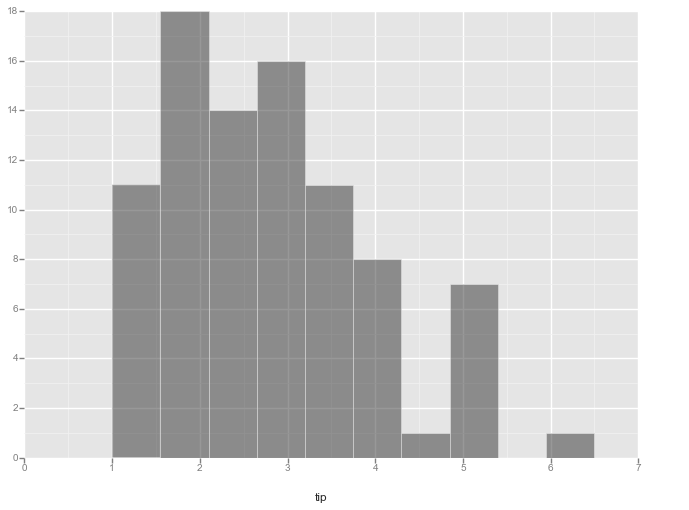

<ggplot: (-9223363262847954807)>

In [108]:
m_tips = tips[tips.sex == 'M']
f_tips = tips[tips.sex == 'F']

# Overlaid histograms
ggplot(f_tips, aes(x='tip')) + \
    geom_histogram(binwidth=1, alpha=.5)

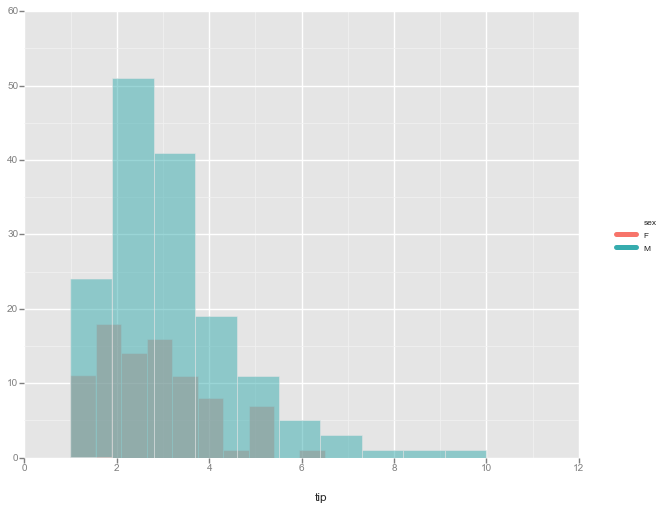

<ggplot: (8774006822313)>

In [109]:
# Overlaid histograms
ggplot(tips, aes(x='tip', fill='sex')) + \
    geom_histogram(binwidth=1, alpha=.5, position="identity")

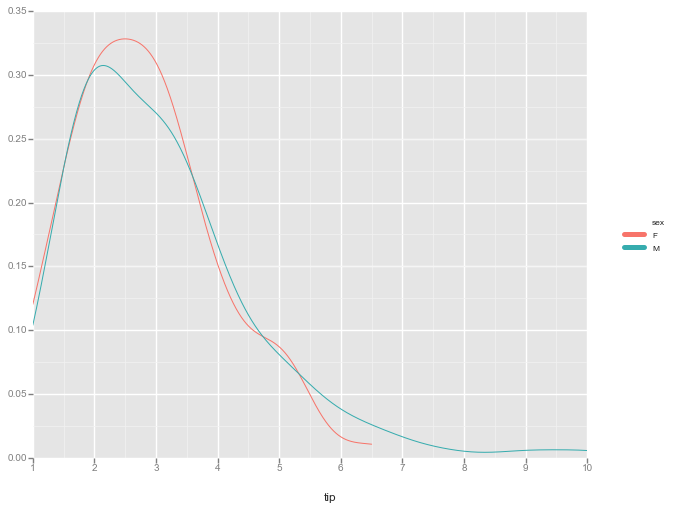

<ggplot: (8774006719580)>

In [110]:
# Density plots
ggplot(tips, aes(x='tip', colour='sex')) + geom_density()

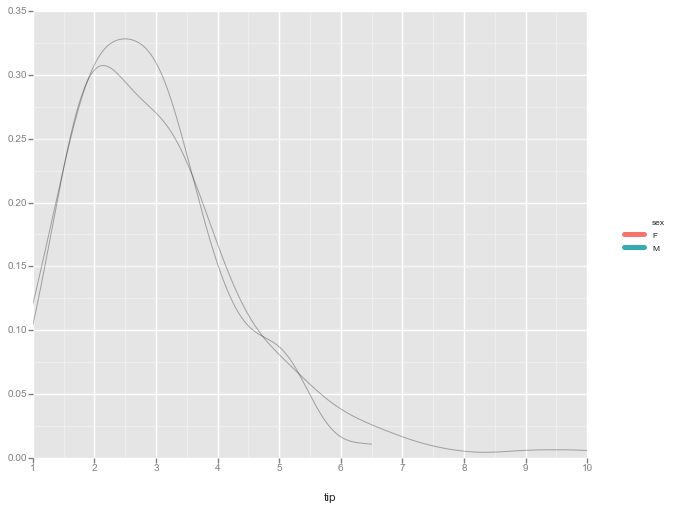

<ggplot: (-9223363262848134200)>

In [111]:
# Density plots with semi-transparent fill
ggplot(tips, aes(x='tip', fill='sex')) + geom_density(alpha=.3)

We said earlier that an essential aspect of data visualization is capturing relationships among many variables: three, four, or even more. This dataset,
simple as it is, illustrates the point. Let us ask, for example, how a third variable such as sex affects the relationship between tip and bill. As sex is
categorical with two levels (i.e., binary), it is natural to divide the data into female and male payers and to generate two scatterplots of tip vs. bill. Let us go even further by including a fourth variable, smoking, which is also binary. We now divide the data into four parts and generate the four scatterplots.

In [ ]:
!sudo /home/io/.tools/anaconda/bin/pip install rpy2

In [ ]:
import rpy2
import pandas as pd
%load_ext rpy2.ipython

In [ ]:
%%R
# The R version of this code

# install.packages('ggplot2')
# install.packages('gridExtra')
library('ggplot2')
library('gridExtra')
tips <- read.csv('../data//tips.csv')

# GET EQUATION AND R-SQUARED AS STRING
# SOURCE: http://goo.gl/K4yhz

plt_cor <- function(subs,x,y) {
  plot_cor <- cor(subs[[x]],subs[[y]])
  return(round(plot_cor,2))
}

p1 <- ggplot(data = subset(tips, (sex == 'M' & smoker == 'No')), aes(x = totbill, y = tip)) +
        geom_point(colour = "black", size = 5) +
        geom_line(colour = "red", size = 1, aes(totbill, totbill*0.18)) +
        geom_text(aes(45, 7 ,label = '18%', vjust = -1)) +
        geom_text(aes(10, 9 ,label = paste('r', plt_cor(subset(tips, (sex == 'M' & smoker == 'No')),'totbill','tip')), vjust = -1)) +
        ggtitle("Male Non-Smokers") +
        xlim(1,50) + ylim(1,10)

p2 <- ggplot(data = subset(tips, (sex == 'M' & smoker == 'Yes')), aes(x = totbill, y = tip)) +
        geom_point(colour = "black", size = 5) +
        geom_line(colour = "red", size = 1, aes(totbill, totbill*0.18)) +
        geom_text(aes(45, 7 ,label = '18%', vjust = -1)) +
        geom_text(aes(10, 9 ,label = paste('r', plt_cor(subset(tips, (sex == 'M' & smoker == 'Yes')),'totbill','tip')), vjust = -1)) +
        ggtitle("Male Smokers") +
        xlim(1,50) + ylim(1,10)


p3 <- ggplot(data = subset(tips, (sex == 'F' & smoker == 'No')), aes(x = totbill, y = tip)) +
        geom_point(colour = "black", size = 5) +
        geom_line(colour = "red", size = 1, aes(totbill, totbill*0.18)) +
        geom_text(aes(45, 7 ,label = '18%', vjust = -1)) +
        geom_text(aes(10, 9 ,label = paste('r', plt_cor(subset(tips, (sex == 'F' & smoker == 'No')),'totbill','tip')), vjust = -1)) +
        ggtitle("Female Non-Smokers") +
        xlim(1,50) + ylim(1,10)


p4 <- ggplot(data = subset(tips, (sex == 'F' & smoker == 'Yes')), aes(x = totbill, y = tip)) +
        geom_point(colour = "black", size = 5) +
        geom_line(colour = "red", size = 1, aes(totbill, totbill*0.18)) +
        geom_text(aes(45, 7 ,label = '18%', vjust = -1)) +
        geom_text(aes(10, 9 ,label = paste('r', plt_cor(subset(tips, (sex == 'F' & smoker == 'Yes')),'totbill','tip')), vjust = -1)) +
        ggtitle("Female Smokers") +
        xlim(1,50) + ylim(1,10)

grid.arrange(p1, p2, p3, p4, ncol = 2, main = "Scatterplots with different sample subsets")

![](assets/unnamed-chunk-52-1.png)

Inspecting these plots reveals numerous features:

1. For smoking parties, there is a lot less association between the size of the tip and the size of the bill; 
1. When a female non-smoker paid the bill, the tip was a very consistent percentage of the bill, with the exceptions of three dining parties;
1. larger bills were mostly paid by men.

In the above example we gained a wealth of insight in a short time. Using nothing but graphical methods we investigated univariate, bivariate, and multivariate relationships. We found both global features and local detail. We saw that tips were rounded; then we saw the obvious correlation between the tip and the size of the bill, noting the scarcity of generous tippers; finally we discovered differences in the tipping behavior of male and female smokers and non-smokers. In contrast, an old-fashioned approach without graphics would be to fit a regression model. Without subtle regression diagnostics (which rely on graphics!), mmthis approach would miss many of the above insights.

## The Bigger picture

![](assets/images-mod1-big-picture-eda.gif)

To understand data analysis, and how visualization fits in, it is useful to talk about it as a process consisting of several stages:

#### The problem statement

Why do you want to analyze this data? Underlying every dataset is a question or problem statement. For the tipping data the question was provided to us from the data source: “What are the factors that affect tipping behavior?” This problem statement drives the process of any data analysis. Sometimes the problem is identified prior to a data collection. Perhaps it is realized after data becomes available because having the data available has made it possible to imagine new issues

#### Data preparation

During this class, I always hand you a single data matrix with each variable clearly defined. In the real world, it can take a great deal of work to construct a clean data matrix. For example, data values may be missing or misrecorded, data may be distributed across several sources, and the variable definitions and data values may be inconsistent across these sources. It is therefore not uncommon for this stage to consume most of the effort that goes into a project. And it is also not uncommon to loop back to this stage after completing the subsequent stages, to re-prepare and re-analyze the data.

#### Exploratory data analysis

At this stage in the analysis, we make time to “play in the sand” to allow us to find the unexpected, and come to some understanding of our data. It is characterized by direct manipulation and dynamic graphics: plots that respond in real time to an analyst’s queries and change dynamically to re-focus, link to information from other sources, and re-organize information. The analyst can work rapidly and thoroughly through the data, slipping out of dead-ends and chasing down new leads. The high level of interactivity is enabled by bare-bones graphics, which are generally not adequate for presentation purposes.

#### Quantitative analysis

At this stage, we use statistical modeling and statistical interference to answer our primary questions. With statistical models, we summarize complex data, decomposing it into estimates of signal and noise. With statistical inference, we try to assess whether a signal is real. Data visualization plays an important role at this stage, although that is less well known than its key role in exploration. It is helpful both in better understanding a model and in assessing its validity in relation to the data.

For Tips, we have not yet answered the primary question of interest. Let’s fit a regression model using tiprate as the response and the remaining variables (except tip and bill) as the explanatory variables. When we do this, only `size` has a significant regression coefficient. 

`ggplot` support for python is no longer under development, so for our linear model plots, let's use a tool called seaborn.

In [112]:
%matplotlib inline

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Visualizing multiple regression with lmplot()

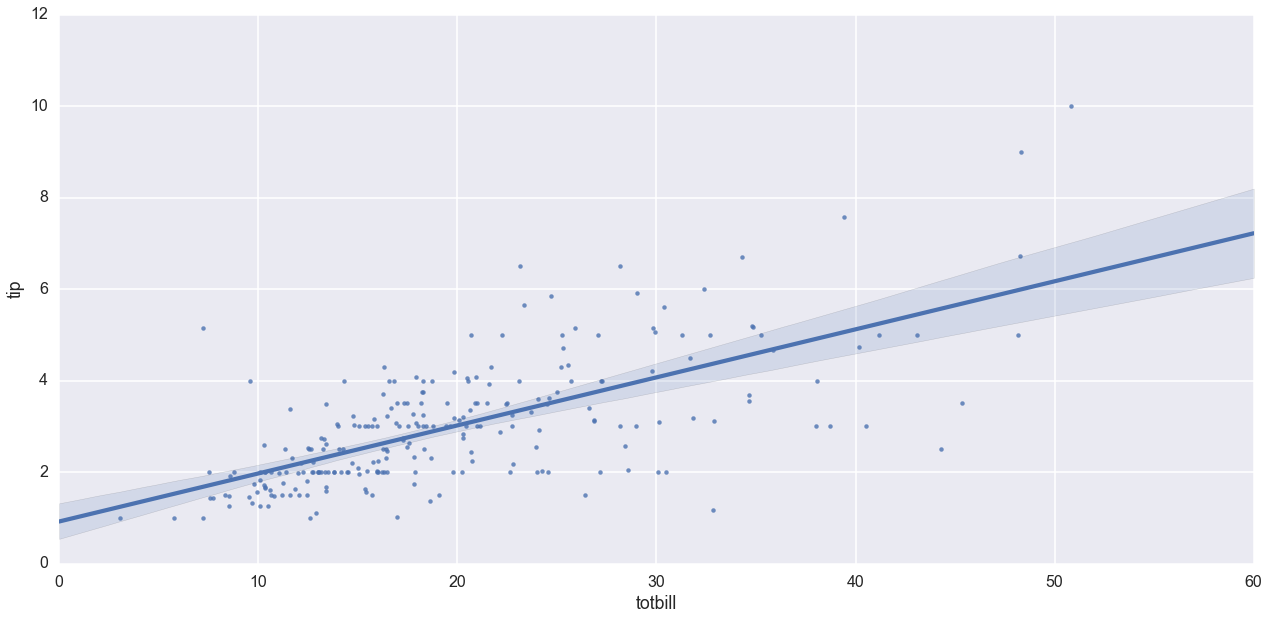

In [114]:
with sns.plotting_context(context='poster'):
    sns.lmplot("totbill", "tip", tips, size=9, aspect=2)

In [115]:
tips

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4
5,6,25.29,4.71,M,No,Sun,Night,4
6,7,8.77,2.00,M,No,Sun,Night,2
7,8,26.88,3.12,M,No,Sun,Night,4
8,9,15.04,1.96,M,No,Sun,Night,2
9,10,14.78,3.23,M,No,Sun,Night,2


This plot has two main components. The first is a scatterplot, showing the observed datapoints. The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model. You can plot different levels of certainty

#### Plotting with discrete predictor variables

Sometimes you will want to plot data where the independent variable is quantitative, but discrete. Although this works fine out of the box:

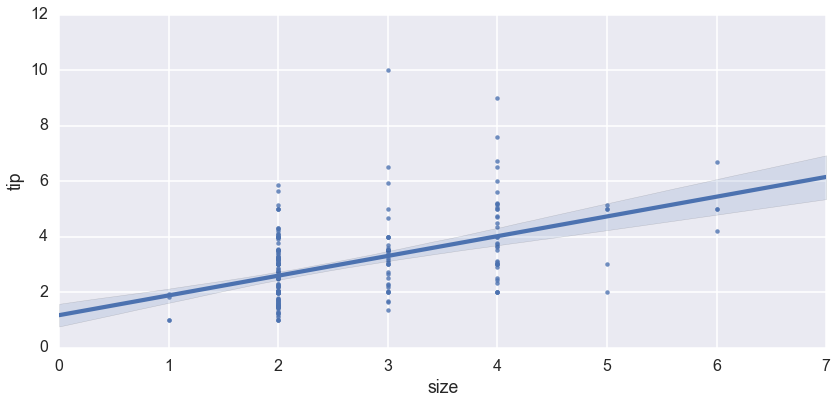

In [116]:
with sns.plotting_context(context='poster'):
    sns.lmplot("size", "tip", tips, size=6, aspect=2)

And can be improved with a bit of jitter:

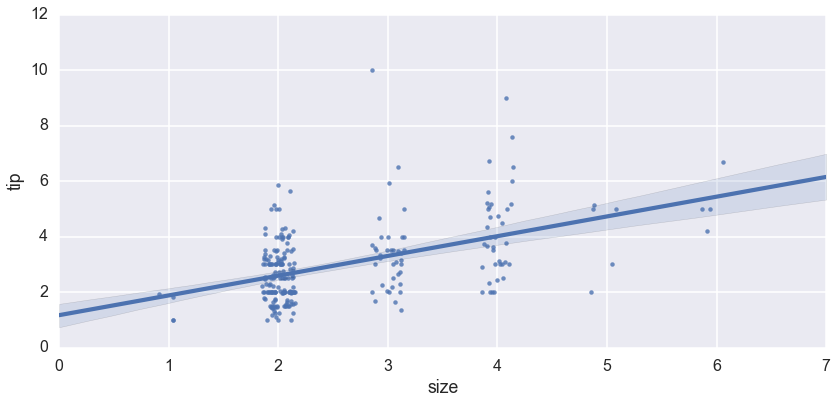

In [117]:
with sns.plotting_context(context='poster'):
    sns.lmplot("size", "tip", tips, size=6, aspect=2, x_jitter=.15);

It might be more informative to estimate the central tendency of each bin. This is easy to do with the x_estimator argument. Just pass any function that aggregates a vector of data into one estimate. The estimator will be bootstrapped and a confidence interval will be plotted – 95% by default, as in other cases within these functions.

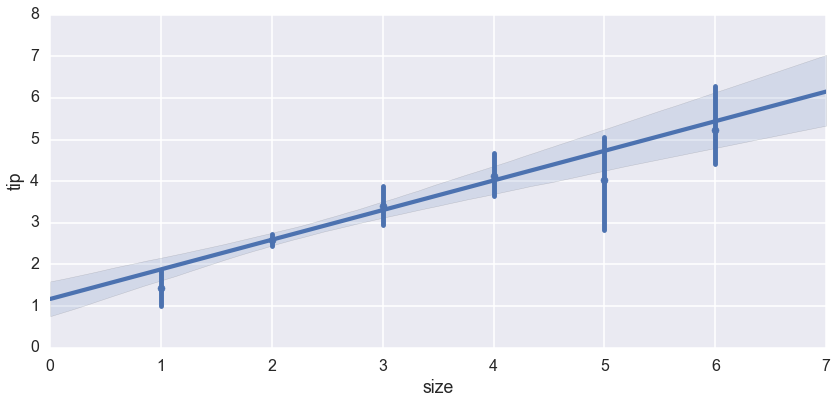

In [118]:
with sns.plotting_context(context='poster'):
    sns.lmplot("size", "tip", tips, x_estimator=np.mean, size=6, aspect=2);

### So what about the model?

Are we satisfied with this model? We have some doubts about it.

In [121]:
tips['tiprate'] = tips.tip / tips.totbill

In [122]:
len(tips[tips['tiprate'] < 0.18])

166

In [123]:
from statsmodels.formula.api import ols

results = ols('tip ~ totbill', tips).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 30 Aug 2016   Prob (F-statistic):           6.69e-34
Time:                        18:42:27   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000         0.606     1.235
totbill        0.1050      0.007     14.260      0.000         0.091     0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

However, in this data it explains only 2% of the variation in tip rate. The points are spread widely around the regression line. There are very few data points for parties of size one, five, and six, which makes us question the validity of the model in these regions. The signal is very weak relative to the noise.

### Presentation

Once an analysis has been completed, the results must be reported, either to clients, managers, or colleagues. The results probably take the form of a narrative and include quantitative summaries such as tables, forecasts, models, and graphics. Quite often, graphics form the bulk of the summaries.

Let's look at some other ways in which data can be sliced and diced in graphs

#### Faceted linear model plots

The lmplot() function is built on top of a FacetGrid. That means it’s easy to visualize how this relationship changes in different subsets of your dataset. You can read the extended documentation for more details on how the FacetGrid class works. The important thing is that you can supply the names of categorical variables that define subsets of the data to plot in different hues or along the row and columns of a grid of axes.

Using a hue facet makes it easiest to directly compare the two subsets:

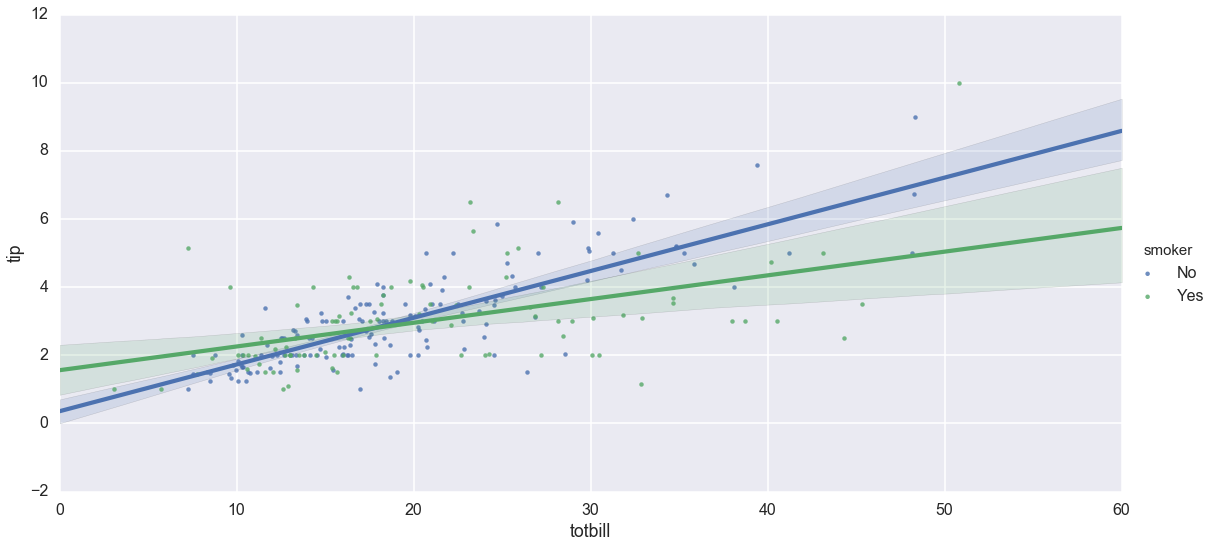

In [124]:
with sns.plotting_context(context='poster'):
    sns.lmplot("totbill", "tip", tips, hue="smoker", size=8, aspect=2);

To make plots that will better reproduce to black-and-white (i.e. when printed), you may want to let the scatterplot marker vary along with the hue variable.

`lmplot()` accepts all arguments that you would use to initialize a FacetGrid, and it returns the grid object after plotting for further tweaking:

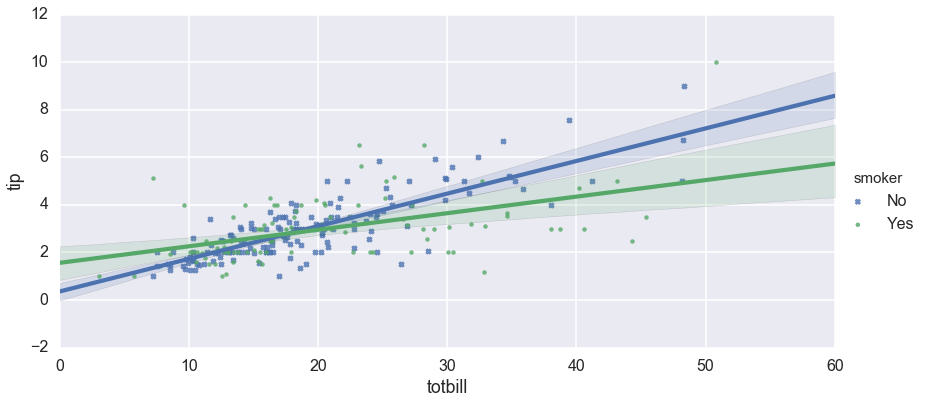

In [125]:
with sns.plotting_context(context='poster'):
    sns.lmplot("totbill", "tip", tips, hue="smoker", markers=["x", "o"], size=6, aspect=2);

Plotting in different columns of a grid also makes a plot that’s easy to understand, although direct comparisons between the subsets are more difficult as the data are separated in space. This might be better when you want the viewer to focus on the relationship within each subset independently.

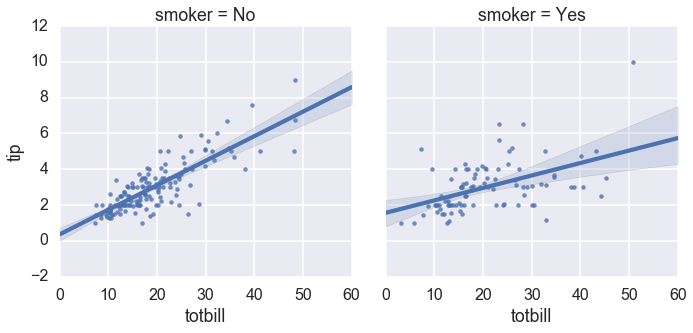

In [126]:
with sns.plotting_context(context='poster'):
    sns.lmplot("totbill", "tip", tips, col="smoker")

`lmplot()` accepts all arguments that you would use to initialize a FacetGrid, and it returns the grid object after plotting for further tweaking:

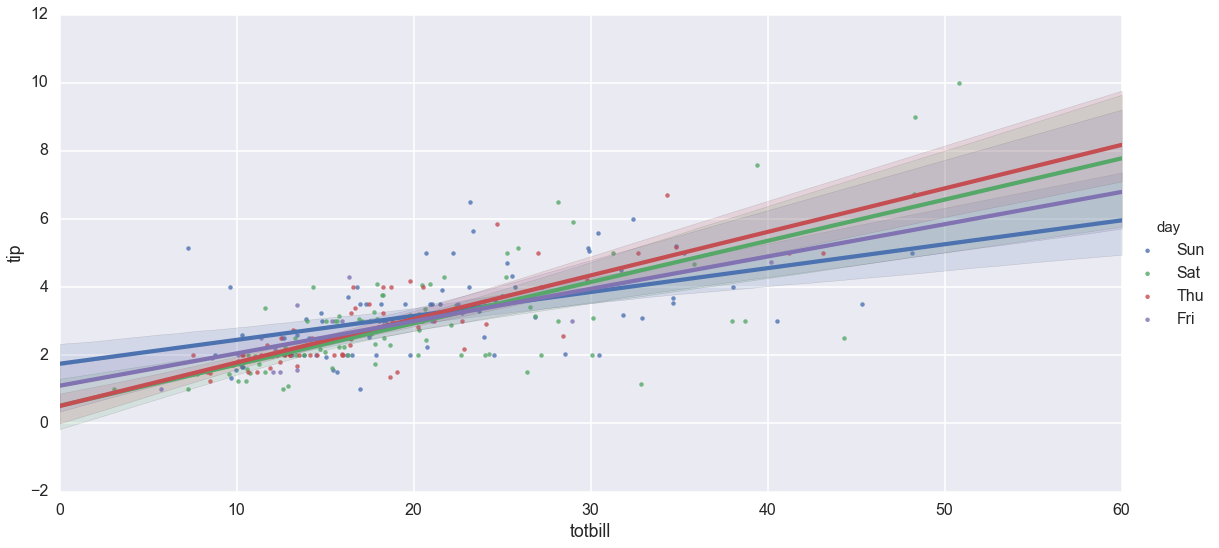

In [127]:
with sns.plotting_context(context='poster'):
    sns.lmplot("totbill", "tip", tips, hue="day", size=8, aspect=2);

In [128]:
sun_tips = tips[tips['day'] == 'Sun']

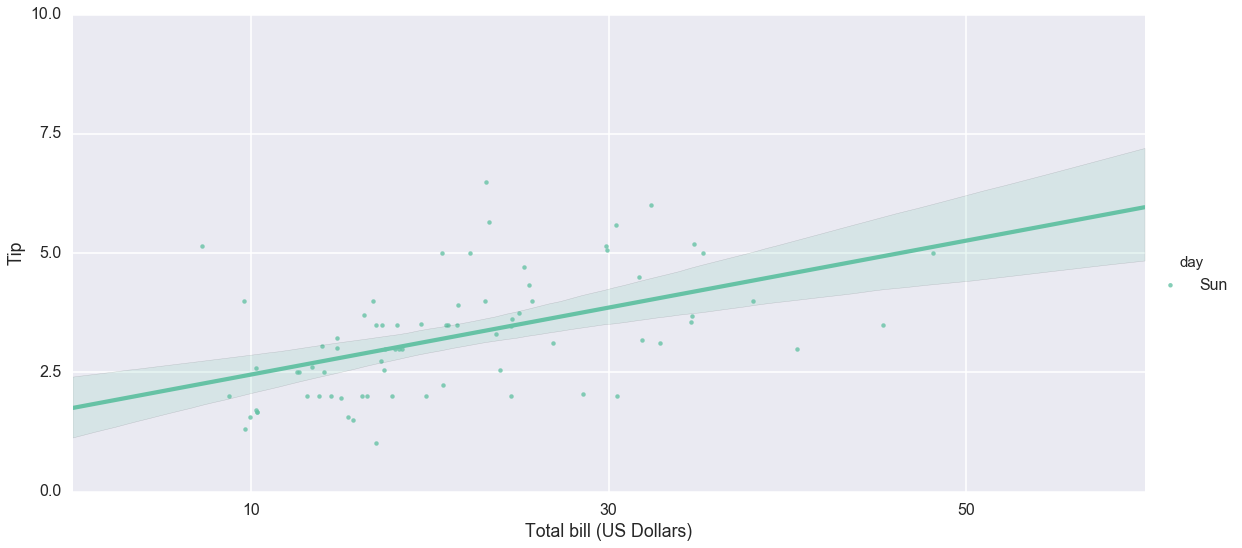

In [129]:
with sns.plotting_context(context='poster'):
    g = sns.lmplot("totbill", "tip", sun_tips, hue="day", palette="Set2",
                   hue_order=["Sun"], size=8, aspect=2)

    g.set_axis_labels("Total bill (US Dollars)", "Tip");

    g.set(xticks=[10, 30, 50], ylim=(0, 10), yticks=[0, 2.5, 5, 7.5, 10]);